## Life Expectancy Prediction Using Regression

Regression is suitable for this application because 
- we have one dependant variable--> Life Expectancy and remaining independent variables

In [3]:
#importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Reading the life expectancy dataset
data = pd.read_csv("Life_Expectancy_Data.csv")
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Data cleaning 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
#Checking for null values
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
data['Life expectancy ']

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64

In [10]:
#
data['Life expectancy '].fillna(data['Life expectancy '].mean(),inplace=True)

In [11]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [12]:
data['Adult Mortality'].fillna(data['Adult Mortality'].mean(),inplace=True)

In [13]:
data['Alcohol'].fillna(data['Alcohol'].mean(),inplace=True)

In [14]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [15]:
data['Hepatitis B'].fillna(data['Hepatitis B'].mean(),inplace=True)

In [16]:
data[' BMI '].fillna(data[' BMI '].mean(),inplace=True)

In [17]:
data['Polio'].fillna(data['Polio'].mean(),inplace=True)

In [18]:
data['Total expenditure'].fillna(data['Total expenditure'].mean(),inplace=True)

In [19]:
data['Diphtheria '].fillna(data['Diphtheria '].mean(),inplace=True)

In [20]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [22]:
data['GDP'].fillna(data['GDP'].mean(),inplace=True)

In [23]:
data['Population'].fillna(data['Population'].mean(),inplace=True)

In [24]:
data[' thinness  1-19 years'].fillna(data[' thinness  1-19 years'].mean(),inplace=True)

In [27]:
data[' thinness 5-9 years'].fillna(data[' thinness 5-9 years'].mean(),inplace=True)

In [28]:
data['Income composition of resources'].fillna(data['Income composition of resources'].mean(),inplace=True)

In [29]:
data['Schooling'].fillna(data['Schooling'].mean(),inplace=True)

In [30]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

### NO null values Now in the dataset

### Let us visualize the data and see its features and insights

In [31]:
#countries with high life expectancy
country_life_expectancy =data.groupby('Country', as_index=False)['Life expectancy '].mean()
country_life_expectancy.sort_values(by = 'Life expectancy ', ascending=False).head(10)

,Country,Life expectancy
84,Japan,82.53750
165,Sweden,82.51875
75,Iceland,82.44375
166,Switzerland,82.33125
60,France,82.21875
82,Italy,82.18750
160,Spain,82.06875
7,Australia,81.81250
125,Norway,81.79375
30,Canada,81.68750


In [33]:
#countries with low life expectancy
country_life_expectancy.sort_values(by = 'Life expectancy ', ascending = True).head(10)

,Country,Life expectancy
152,Sierra Leone,46.11250
31,Central African Republic,48.51250
94,Lesotho,48.78125
3,Angola,49.01875
100,Malawi,49.89375
32,Chad,50.38750
44,Côte d'Ivoire,50.38750
192,Zimbabwe,50.48750
164,Swaziland,51.32500
123,Nigeria,51.35625


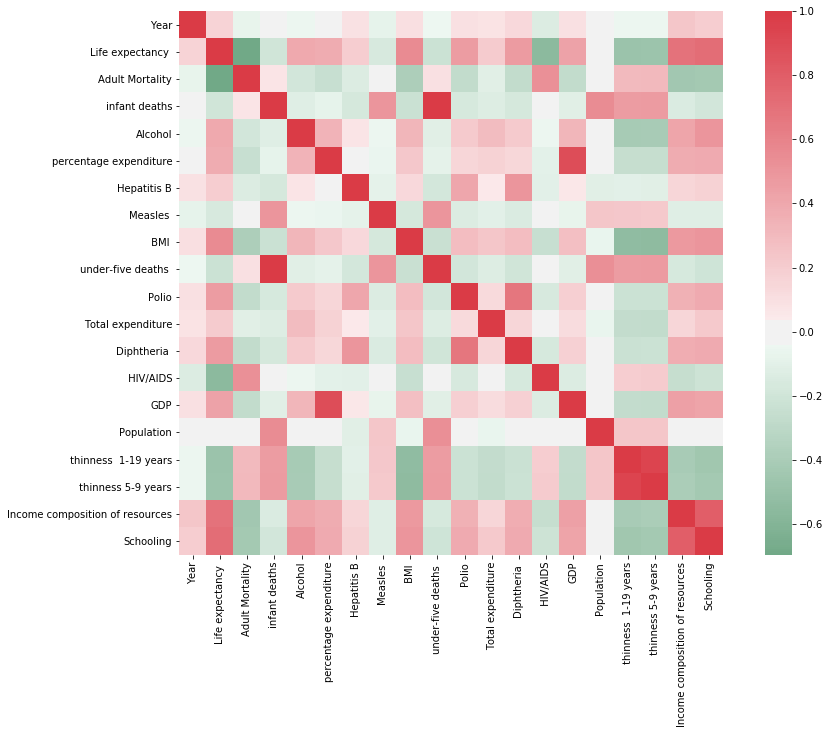

In [35]:
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(data.corr(), cmap =cmap, center=0, annot=False, square=True);

### Insights from the heatmap
- life expectancy as negative correlation with diseases and positive with schooling
- Those who got vaccinated have high life expectancy

In [41]:
target = data["Life expectancy "]
features = data[data.columns.difference(['Life expectancy '])]

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(pd.get_dummies(features), target, test_size=0.3)

In [43]:
X_train

,BMI,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Adult Mortality,Alcohol,Diphtheria,GDP,Hepatitis B,Income composition of resources,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
1965,53.4,0.1,2.0,1.9,127.0,6.87,85.0,7429.628274,85.000000,0.755000,...,0,0,0,0,0,0,0,0,0,1
813,52.9,0.1,3.3,3.2,176.0,0.16,97.0,7483.158469,97.000000,0.623000,...,0,0,0,0,0,0,0,0,0,1
1171,6.6,0.1,1.0,0.9,49.0,7.45,9.0,52473.113560,80.940461,0.915000,...,0,0,0,0,0,0,0,0,1,0
2051,54.5,0.1,2.4,2.6,142.0,9.06,99.0,5693.524160,97.000000,0.796000,...,0,0,0,0,0,0,0,0,1,0
722,21.1,1.1,9.7,9.5,266.0,0.01,8.0,7483.158469,8.000000,0.627551,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894,24.7,3.9,1.1,9.9,362.0,0.01,49.0,3221.678128,49.000000,0.521000,...,0,0,0,0,0,0,0,0,0,1
2872,54.1,0.1,1.8,1.7,169.0,8.05,7.0,7483.158469,53.000000,0.672000,...,0,0,0,1,0,0,0,0,0,1
468,17.0,0.3,11.0,11.2,19.0,2.12,88.0,882.491462,88.000000,0.533000,...,0,0,0,0,0,0,0,0,0,1
972,2.9,3.0,9.2,9.1,294.0,2.26,95.0,7483.158469,95.000000,0.412000,...,0,0,0,0,0,0,0,0,0,1


In [44]:
X_test

,BMI,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Adult Mortality,Alcohol,Diphtheria,GDP,Hepatitis B,Income composition of resources,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
1619,23.2,1.6,7.9,7.7,272.0,0.010000,73.0,825.572992,73.000000,0.430000,...,0,0,0,0,0,0,0,0,0,1
220,45.4,0.4,4.1,4.1,121.0,7.650000,89.0,1228.544700,91.000000,0.753000,...,0,0,0,0,0,0,0,0,0,1
235,56.2,0.1,2.4,2.5,247.0,12.050000,99.0,2378.339270,99.000000,0.703000,...,0,0,0,0,0,0,0,0,0,1
1402,67.1,0.1,3.2,3.1,89.0,0.030000,99.0,45793.976140,99.000000,0.787000,...,0,0,0,0,0,0,0,0,0,1
809,55.5,0.1,3.1,3.0,172.0,0.240000,97.0,7483.158469,97.000000,0.651000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,45.4,2.3,1.9,1.8,165.0,3.670000,98.0,3719.973510,98.000000,0.689000,...,0,0,0,0,0,0,0,0,0,1
1069,43.1,0.4,1.4,1.4,21.0,2.400000,87.0,1872.737830,80.940461,0.564000,...,0,0,0,0,0,0,0,0,0,1
2384,21.1,0.9,7.2,7.0,336.0,0.010000,31.0,7483.158469,80.940461,0.627551,...,0,0,0,0,0,0,0,0,0,1
1060,49.3,0.4,1.2,1.2,189.0,1.930000,85.0,3452.828934,85.000000,0.611000,...,0,0,0,0,0,0,0,0,0,1


In [52]:
Y_test

1619    57.8
220     73.7
235     68.2
1402    73.7
809     69.8
        ... 
1309    73.3
1069    69.6
2384    51.9
1060    71.4
2569    74.9
Name: Life expectancy , Length: 882, dtype: float64

In [53]:
Y_train

1965    76.8
813     69.0
1171    82.5
2051    74.7
722     59.3
        ... 
1894    53.6
2872    72.5
468     67.0
972     57.7
734     52.1
Name: Life expectancy , Length: 2056, dtype: float64

In [45]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
Y_pred=model.predict(X_test)
Y_pred

array([57.18295348, 72.90263846, 69.22829855, 73.87989298, 72.39816787,
       75.78894937, 66.68681338, 71.9431548 , 77.27800179, 75.42828704,
       71.69506169, 71.79557987, 80.68888458, 56.12136969, 70.75127852,
       61.64534926, 63.32353029, 60.20349102, 68.16791487, 74.57214744,
       80.23846412, 68.14055073, 71.64115886, 68.70736716, 80.41032292,
       63.382685  , 78.09301053, 75.83317215, 62.41965335, 57.94457706,
       69.29621239, 80.21765636, 74.52636717, 63.27173846, 53.23990521,
       70.4021689 , 85.13856123, 80.15839814, 68.25100439, 73.78954997,
       77.02925217, 58.4972335 , 65.9193519 , 76.3147421 , 72.29984039,
       59.9937545 , 77.86548553, 67.37071159, 60.08351925, 76.54962881,
       74.31145649, 77.19646398, 63.53479753, 77.14115116, 54.64499565,
       75.2491469 , 53.77779357, 72.91948574, 71.04555676, 67.64673171,
       71.96806385, 59.82023293, 66.53494824, 69.39257321, 71.00918963,
       79.7096591 , 78.05308974, 71.75097648, 75.91586625, 70.33

In [47]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(Y_test,Y_pred)*100


95.73765314353648